## Toma una foto con la cámara del computador a una persona con lentes y aplique la detección de bordes con el fin de detectar solo los lentes de la persona y su silueta sin usar componentes adicionales que los vistos en clases.

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

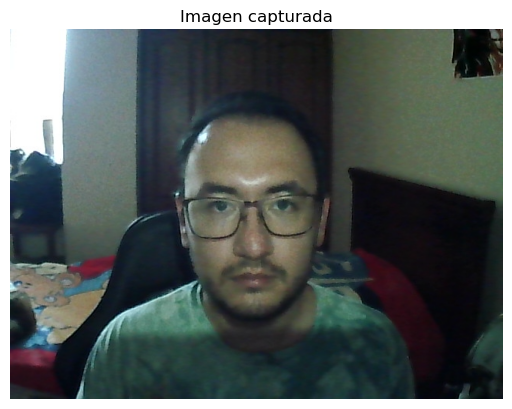

In [ ]:
# 1. Capturar imagen desde la cámara

import cv2                     # Importa OpenCV para manejo de cámara e imágenes
import numpy as np              # Importa NumPy para operaciones numéricas
import matplotlib.pyplot as plt # Importa Matplotlib para mostrar imágenes

# Se define la funcionalidad de grabar video mediante la cámara usando OpenCV
cap = cv2.VideoCapture(0)       # Abre la cámara por defecto

# Se define un bucle infinito para mantener la cámara activa
while True:
    ret, frame = cap.read()     # Captura un frame de la cámara
                                # ret indica si la captura fue exitosa
                                # frame es la imagen capturada

    if not ret:                # Si da error al capturar el frame
        break                  # Sale del bucle

    h, w, _ = frame.shape      # Obtiene alto, ancho y canales de la imagen

    # Tamaño del rectángulo, zona donde se colocarán los lentes
    rect_w = int(w * 0.4)
    rect_h = int(h * 0.25)

    # Coordenadas para centrar el rectángulo en la imagen
    x1 = w // 2 - rect_w // 2
    y1 = h // 2 - rect_h // 2
    x2 = x1 + rect_w
    y2 = y1 + rect_h

    # Se crea una copia del frame original para dibujar encima
    frame_rect = frame.copy()

    # Dibuja un rectángulo verde como guía
    cv2.rectangle(
        frame_rect,
        (x1, y1),
        (x2, y2),
        (0, 255, 0),
        2
    )

    # Escribe un texto encima del rectángulo
    cv2.putText(
        frame_rect,
        "Coloque los lentes aqui",
        (x1, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 255, 0),
        2
    )

    # Muestra la ventana con la imagen y el rectángulo guía
    cv2.imshow("Presione ESPACIO para capturar", frame_rect)

    # Espera 1 ms y captura la tecla presionada
    key = cv2.waitKey(1)

    if key == 32:              # Si se presiona la tecla ESPACIO
        img = frame.copy()     # Guarda la imagen capturada
        roi_coords = (x1, y1, x2, y2)  # Guarda las coordenadas del rectángulo
        break                  # Sale del bucle
    elif key == 27:            # Si se presiona la tecla ESC
        img = None             # No se guarda ninguna imagen
        break                  # Sale del bucle

# Libera la cámara
cap.release()

# Cierra todas las ventanas de OpenCV
cv2.destroyAllWindows()

# 2. Mostrar la imagen capturada

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen capturada")
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(119.5), np.float64(-0.5))

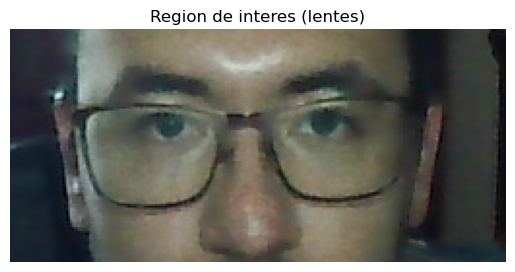

In [ ]:
# Se extraen las coordenadas del rectángulo guardadas previamente
x1, y1, x2, y2 = roi_coords

# Se recorta la región de interés desde la imagen original
roi = img[y1:y2, x1:x2]

# Se muestra la región recortada convirtiendo de BGR a RGB
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

# Se agrega un título a la imagen mostrada
plt.title("Region de interes (lentes)")

# Se ocultan los ejes para una visualización más limpia
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(119.5), np.float64(-0.5))

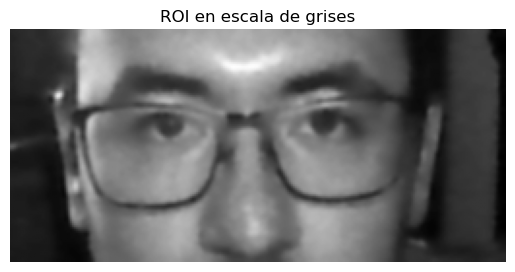

In [ ]:
# Convierte la región de interés de color BGR a escala de grises con el objetivo de definir mejor el contorno de los lentes
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Aplica un desenfoque Gaussiano para reducir ruido
blur_roi = cv2.GaussianBlur(
    gray_roi,
    (5, 5),
    0
)

# Muestra la imagen desenfocada usando un mapa de color en grises
plt.imshow(blur_roi, cmap="gray")

# Título de la imagen mostrada
plt.title("ROI en escala de grises")

# Oculta los ejes para una visualización más limpia
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(119.5), np.float64(-0.5))

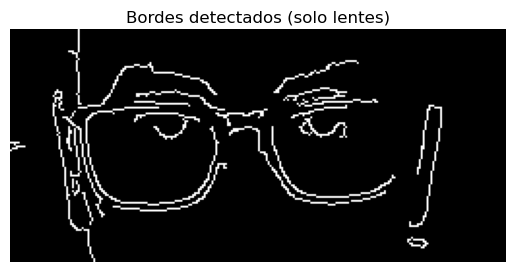

In [ ]:
# Aplica el detector de bordes Canny sobre la imagen
edges_roi = cv2.Canny(
    blur_roi,
    50,
    150
)

# Muestra la imagen resultante con los bordes detectados
plt.imshow(edges_roi, cmap="gray")

# Título de la visualización
plt.title("Bordes detectados (solo lentes)")

# Oculta los ejes para una mejor visualización
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

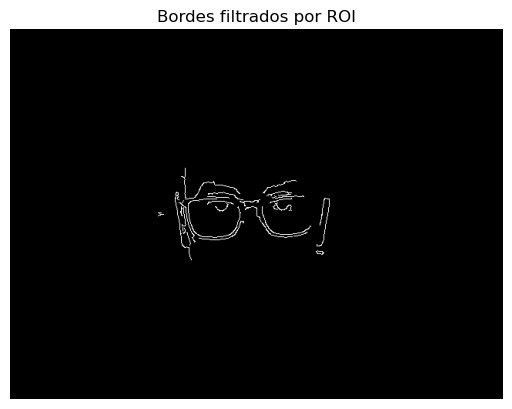

In [ ]:
# Crea una imagen vacía con el mismo tamaño que la ROI en escala de grises
edges_full = np.zeros_like(gray_roi)
# ⚠️ Nota: esta variable no se usa después, podrías eliminarla sin afectar el resultado

# Crea una imagen negra del tamaño completo de la imagen original
edges_image = np.zeros(
    img.shape[:2],   # Solo alto y ancho
    dtype=np.uint8   # Tipo de dato para imágenes
)

# Inserta los bordes detectados del ROI en su posición original dentro de la imagen completa
edges_image[y1:y2, x1:x2] = edges_roi
# Se respetan las coordenadas donde estaba el rectángulo de la ROI

# Muestra la imagen final con los bordes solo en la zona de interés
plt.imshow(edges_image, cmap="gray")

# Título de la visualización
plt.title("Bordes filtrados por ROI")

# Oculta los ejes
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

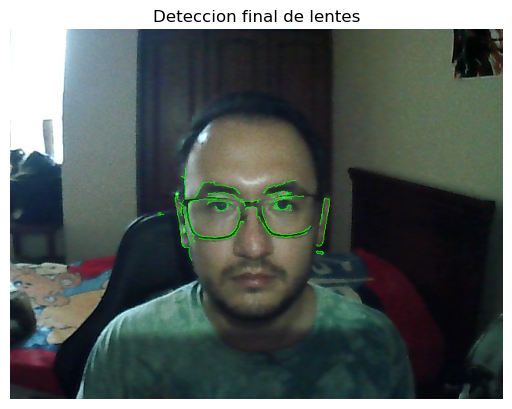

In [ ]:
# Crea una copia de la imagen original para no modificarla directamente
result = img.copy()

# Colorea de verde los píxeles donde se detectaron bordes
result[edges_image != 0] = [0, 255, 0]
# edges_image != 0 crea una máscara booleana
# Solo los píxeles con bordes se reemplazan por color verde

# Muestra la imagen final convirtiendo de BGR a RGB
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# Título de la imagen
plt.title("Deteccion final de lentes")

# Oculta los ejes
plt.axis("off")